# PTM Biological Replicates
We see systematic differences in PTM ratios in the cell lines (see the first figure below). The systematic differences in PTM distributions can be caused by a number of factors:
* 'interesting' differences in the biology of the cell lines
* 'uninteresting' differences in the incorporation of tags in the cell lines 
* 'uninteresting' differences in the population of the cell lines 

Out of the 45 cancer cell lines measurements in the PTM data, three measurements are of duplicate cell lines (run in different plexes):
* H1437 (measured in plexes 8 and 9)
* H209 (measured in plexes 1 and 9)
* H2073 (measured in plexes 6 and 9)

The biological replicates can be used to investigate the systematic differences. For instance we expect that if the systematic differences are biological then we would expect that biological replicates to show the same systematic difference. If biological replicates do not show the same systematic difference then we expect that the systematic difference is not biological in nature. 

In [30]:
# imports and plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
from copy import deepcopy

# use clustergrammer module to load/process (source code in clustergrammer directory)
from clustergrammer import Network

In [33]:
def plot_cl_boxplot_with_missing_data(inst_df, ylim=5):
    '''
    Make a box plot of the cell lines where the cell lines are ranked based 
    on their average PTM levels
    '''
    print(inst_df.shape)
    # get the order of the cell lines based on their mean 
    sorter = inst_df.mean().sort_values().index.tolist()
    # reorder based on ascending mean values
    sort_df = inst_df[sorter]
    # box plot of PTM values ordered based on increasing mean 
    sort_df.plot(kind='box', figsize=(10,5), rot=90, ylim=(-ylim, ylim))

### Systematic Differences in PTM Ratios
Below is a box plot of the 8,468 unique PTM measurements in all 45 measurements. 

In [37]:
filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/all_ptm_ratios.tsv'
net = deepcopy(Network())
net.load_file(filename)
net.normalize(axis='row', norm_type='zscore')
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

(8468, 45)


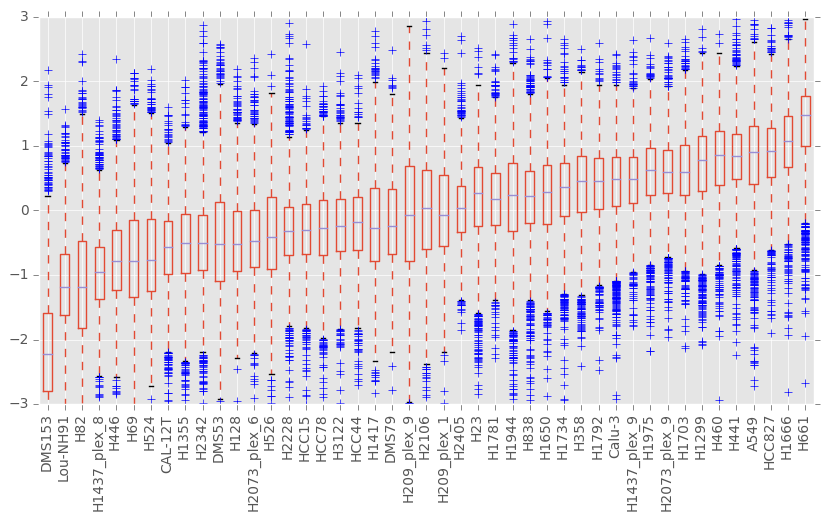

In [38]:
plot_cl_boxplot_with_missing_data(inst_df, 3)